# Merge, split-apply-combine, Visualize
In this section we will cover how to sq-like merging(joining), the split-apply-combine to aggregating data and of course visualization

In [4]:
# Lets import our packages. Notice matplotlib is imported as well as a magic command to make plots
# interactivel inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

## Fun example to get things started
Remember back at the beginning of the class where there was a [link](http://pandas.pydata.org/pandas-docs/stable/api.html) to the python API. What if we wanted to an automated way to count the total number of functions and methods on that page. pandas suprisingly has an answer to this query. Out of all the ways that pandas can bring data into the workspace the read_html might be the most fun. If we inspect the API page we can see that the all the references are buried in html tables. pandas has a method to extract html tables directly into dataframes.  

In [5]:
# Use the read_html function to pull all the table from a specific url into a list.

In [8]:
# Grab the tables
api_tables = pd.read_html('http://pandas.pydata.org/pandas-docs/stable/api.html')
len(api_tables)

119

In [7]:
api_tables[0]

,0,1
0,read_pickle(path),Load pickled pandas object (or any other pickl...


In [9]:
api_tables[-1]

,0,1
0,"describe_option(pat[, _print_desc])",Prints the description for one or more registe...
1,reset_option(pat),Reset one or more options to their default value.
2,get_option(pat),Retrieves the value of the specified option.
3,"set_option(pat, value)",Sets the value of the specified option.
4,option_context(*args),Context manager to temporarily set options in ...


## As you can verify the tables, the first and last tables show the first and last entries into the pandas API page
Lets count all the rows in all the ables. To do this 

In [13]:
total = 0
for table in api_tables:
    total += table.size
print("Total number of methods/functions is", total)

Total number of methods/functions is 1854


## Merging
Several datasets have been created to showcase the merge utility in pandas which is equivalent to a sql join. Merges allow the user to specify the rows to join on (though pandas will intelligently guess that the joining columns are the ones that are the same. Left, outer, inner, cross joins are all supported.

In [31]:
customer = pd.read_csv('data/customer.csv')
item = pd.read_csv('data/item.csv')
store = pd.read_csv('data/store.csv')
po = pd.read_csv('data/purchase_order.csv')

In [32]:
customer

,customer_id,customer_name,Total Visits
0,1,Ted,22
1,2,Greg,12


In [33]:
item

,item_id,item_name,price
0,20,Banana,0.39
1,19,Mango,1.00
2,209,Steak,8.00
3,22,Milk,4.00


In [34]:
store

,store_id,store_name,store_address
0,198,North,Park Ave
1,177,South,South Park Ave


In [35]:
po

,store_id,customer_id,item_id,quantity
0,198,1,20,4
1,198,1,19,3
2,198,1,209,10
3,177,1,20,40
4,177,1,22,33
5,198,2,20,10
6,198,2,18,2
7,177,2,209,20
8,177,2,10,20


In [36]:
first = pd.merge(po, store, how='left')
first

,store_id,customer_id,item_id,quantity,store_name,store_address
0,198,1,20,4,North,Park Ave
1,198,1,19,3,North,Park Ave
2,198,1,209,10,North,Park Ave
3,177,1,20,40,South,South Park Ave
4,177,1,22,33,South,South Park Ave
5,198,2,20,10,North,Park Ave
6,198,2,18,2,North,Park Ave
7,177,2,209,20,South,South Park Ave
8,177,2,10,20,South,South Park Ave


In [39]:
second = pd.merge(first, item, how='left', left_on='item_id', right_on = 'item_id')
second

,store_id,customer_id,item_id,quantity,store_name,store_address,item_name,price
0,198,1,20,4,North,Park Ave,Banana,0.39
1,198,1,19,3,North,Park Ave,Mango,1.00
2,198,1,209,10,North,Park Ave,Steak,8.00
3,177,1,20,40,South,South Park Ave,Banana,0.39
4,177,1,22,33,South,South Park Ave,Milk,4.00
5,198,2,20,10,North,Park Ave,Banana,0.39
6,198,2,18,2,North,Park Ave,NaN,NaN
7,177,2,209,20,South,South Park Ave,Steak,8.00
8,177,2,10,20,South,South Park Ave,NaN,NaN


In [42]:
df = second.merge(customer, how='left')
df

,store_id,customer_id,item_id,quantity,store_name,store_address,item_name,price,customer_name,Total Visits
0,198,1,20,4,North,Park Ave,Banana,0.39,Ted,22
1,198,1,19,3,North,Park Ave,Mango,1.00,Ted,22
2,198,1,209,10,North,Park Ave,Steak,8.00,Ted,22
3,177,1,20,40,South,South Park Ave,Banana,0.39,Ted,22
4,177,1,22,33,South,South Park Ave,Milk,4.00,Ted,22
5,198,2,20,10,North,Park Ave,Banana,0.39,Greg,12
6,198,2,18,2,North,Park Ave,NaN,NaN,Greg,12
7,177,2,209,20,South,South Park Ave,Steak,8.00,Greg,12
8,177,2,10,20,South,South Park Ave,NaN,NaN,Greg,12


In [43]:
# Use group_by to splits
gb = df.groupby('store_id')

In [51]:
for name, group in gb:
    print(name)
    print(group)

177
   store_id  customer_id  item_id  quantity store_name    store_address  \
3       177            1       20        40      South   South Park Ave   
4       177            1       22        33      South   South Park Ave   
7       177            2      209        20      South   South Park Ave   
8       177            2       10        20      South   South Park Ave   

  item_name  price customer_name  Total Visits  
3    Banana   0.39           Ted            22  
4      Milk   4.00           Ted            22  
7     Steak   8.00          Greg            12  
8       NaN    NaN          Greg            12  
198
   store_id  customer_id  item_id  quantity store_name store_address  \
0       198            1       20         4      North      Park Ave   
1       198            1       19         3      North      Park Ave   
2       198            1      209        10      North      Park Ave   
5       198            2       20        10      North      Park Ave   
6       198

In [55]:
print([method for method in dir(gb) if method[0] != '_'])

['agg', 'aggregate', 'all', 'any', 'apply', 'backfill', 'bfill', 'boxplot', 'corr', 'corrwith', 'count', 'cov', 'cumcount', 'cummax', 'cummin', 'cumprod', 'cumsum', 'customer_id', 'customer_name', 'describe', 'diff', 'dtypes', 'ffill', 'fillna', 'filter', 'first', 'get_group', 'groups', 'head', 'hist', 'idxmax', 'idxmin', 'indices', 'irow', 'item_id', 'item_name', 'last', 'mad', 'max', 'mean', 'median', 'min', 'name', 'ndim', 'ngroups', 'nth', 'ohlc', 'pad', 'pct_change', 'plot', 'price', 'prod', 'quantile', 'quantity', 'rank', 'resample', 'sem', 'shift', 'size', 'skew', 'std', 'store_address', 'store_id', 'store_name', 'sum', 'tail', 'take', 'transform', 'tshift', 'var']


In [56]:
gb.count()

,customer_id,item_id,quantity,store_name,store_address,item_name,price,customer_name,Total Visits
store_id,,,,,,,,,
177,4,4,4,4,4,3,3,4,4
198,5,5,5,5,5,4,4,5,5


In [45]:
gb.sum()

,customer_id,item_id,quantity,price,Total Visits
store_id,,,,,
177,6,261,113,12.39,68
198,7,286,29,9.78,90


In [46]:
df = pd.read_csv('data/baseball.csv')

<IPython.core.display.Javascript object>


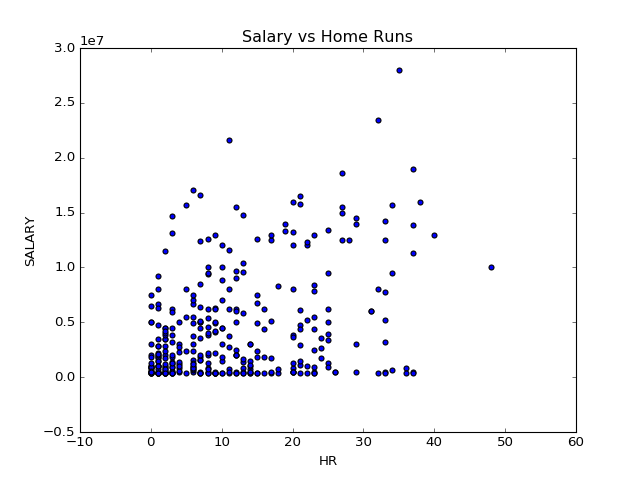

In [48]:
df.plot(x='HR', y='SALARY', kind='scatter', title='Salary vs Home Runs');

In [49]:
plt.style.use('ggplot')

<IPython.core.display.Javascript object>


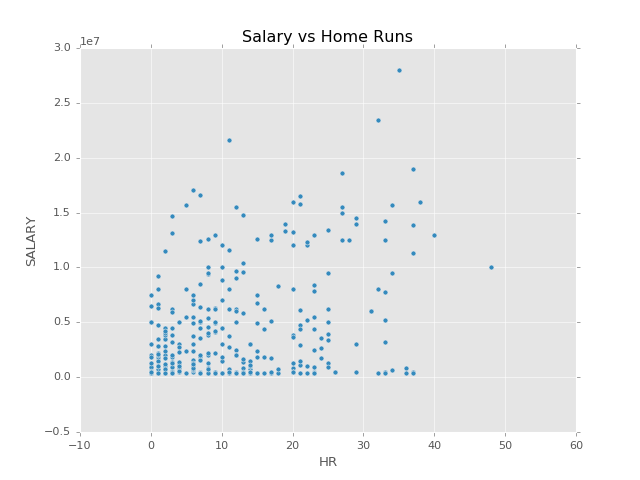

In [50]:
df.plot(x='HR', y='SALARY', kind='scatter', title='Salary vs Home Runs');